In [47]:
from py_env_hpc import *
import os
import xarray as xr

date_start = "2018-01-01T13"
date_end = "2023-12-31T23"

# Open the reference dataset (day01)
reference_file = "ADAPTER_DE05.day01.merged.nc"
reference_ds = xr.open_dataset(os.path.join(HRES_PREP, reference_file)).sel(time=slice(date_start, date_end))

# Loop through the files in the directory
for filename in sorted(os.listdir(HRES_PREP))[-1:]:
    print ("generating the mismatch for " + filename)
    # Check if the file is a day file (day02, day03, ..., day10)
    if filename.startswith("ADAPTER_DE05.day") and filename.endswith(".merged.nc") and filename != reference_file:
        # Open the dataset
        dataset = xr.open_dataset(os.path.join(HRES_PREP, filename)).sel(time=slice(date_start, date_end))
        dataset, reference_ds = xr.align(dataset, reference_ds, join='inner')
        mismatch_data = dataset - reference_ds
        output_filename = filename.replace("day", "mismatch.day")
        mismatch_data.to_netcdf(os.path.join(HRES_PREP, output_filename))
        #dataset.close()

# Close the reference dataset
#reference_ds.close()


generating the mismatch for ADAPTER_DE05.day10.merged.nc


In [48]:
reference_ds

<xarray.Dataset>
Dimensions:    (time: 8725, longitude: 196, latitude: 125)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-10T18:00:00 ... 2023-12-31T18:00:00
  * longitude  (longitude) float32 -1.1 -1.0 -0.9 -0.8 ... 18.1 18.2 18.3 18.4
  * latitude   (latitude) float32 56.5 56.4 56.3 56.2 ... 44.4 44.3 44.2 44.1
Data variables:
    pr         (time, latitude, longitude) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.2 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      deltat, mulc, unit, selname, group files by forecast lead t...
    CDO:          Climate Data Operators version 2.0.2 (https://mpimet.mpg.de...

In [49]:
dataset

<xarray.Dataset>
Dimensions:    (time: 8725, longitude: 196, latitude: 125)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-10T18:00:00 ... 2023-12-31T18:00:00
  * longitude  (longitude) float32 -1.1 -1.0 -0.9 -0.8 ... 18.1 18.2 18.3 18.4
  * latitude   (latitude) float32 56.5 56.4 56.3 56.2 ... 44.4 44.3 44.2 44.1
Data variables:
    pr         (time, latitude, longitude) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.2 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      deltat, mulc, unit, selname, group files by forecast lead t...
    CDO:          Climate Data Operators version 2.0.2 (https://mpimet.mpg.de...

In [50]:
mismatch_data

<xarray.Dataset>
Dimensions:    (time: 8725, longitude: 196, latitude: 125)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-10T18:00:00 ... 2023-12-31T18:00:00
  * longitude  (longitude) float32 -1.1 -1.0 -0.9 -0.8 ... 18.1 18.2 18.3 18.4
  * latitude   (latitude) float32 56.5 56.4 56.3 56.2 ... 44.4 44.3 44.2 44.1
Data variables:
    pr         (time, latitude, longitude) float64 -0.002087 0.1439 ... 0.0 0.0

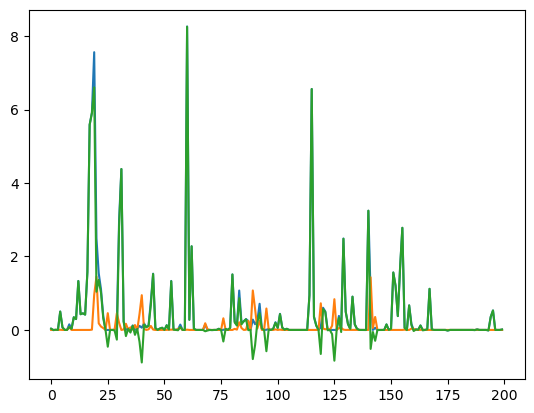

In [53]:
plt.plot(dataset.pr[:200, 50, 50]) 
plt.plot(reference_ds.pr[:200, 50, 50]) 
plt.plot(mismatch_data.pr[:200, 50, 50]) 